<a href="https://colab.research.google.com/github/shivsurya-s/Task_7/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv("https://raw.githubusercontent.com/shivsurya-s/Task_7/main/Dataset/trainKNN.txt",header=None,sep=',',
names=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])

In [4]:
test=pd.read_csv("https://raw.githubusercontent.com/shivsurya-s/Task_7/main/Dataset/testKNN.txt",header=None,sep=',',
names=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])

In [5]:
print(train.shape)
print(test.shape)

(196, 11)
(18, 11)


In [6]:
print(train.isna().sum())
print(test.isna().sum())

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64
Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64


In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      196 non-null    int64  
 1   RI             196 non-null    float64
 2   Na             196 non-null    float64
 3   Mg             196 non-null    float64
 4   Al             196 non-null    float64
 5   Si             196 non-null    float64
 6   K              196 non-null    float64
 7   Ca             196 non-null    float64
 8   Ba             196 non-null    float64
 9   Fe             196 non-null    float64
 10  Type of glass  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB
None


In [8]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      18 non-null     int64  
 1   RI             18 non-null     float64
 2   Na             18 non-null     float64
 3   Mg             18 non-null     float64
 4   Al             18 non-null     float64
 5   Si             18 non-null     float64
 6   K              18 non-null     float64
 7   Ca             18 non-null     float64
 8   Ba             18 non-null     float64
 9   Fe             18 non-null     float64
 10  Type of glass  18 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 1.7 KB
None


In [9]:
features = train.columns[:-1].tolist()
features

['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


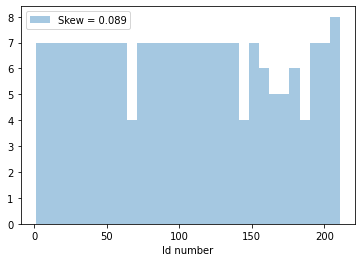

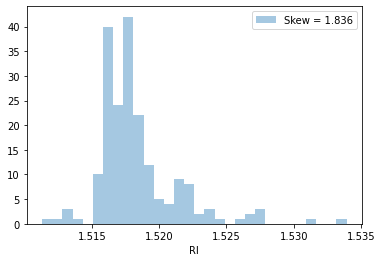

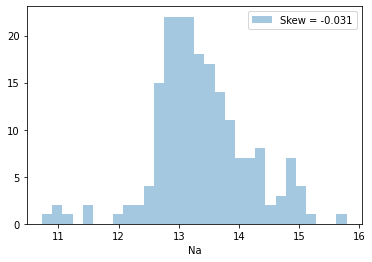

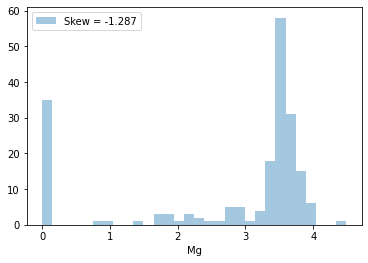

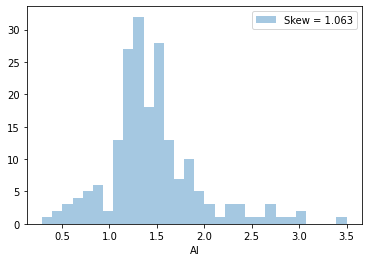

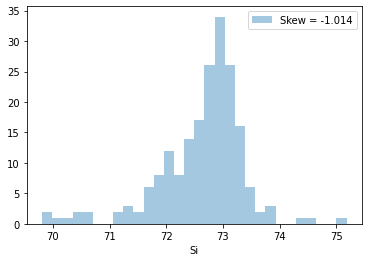

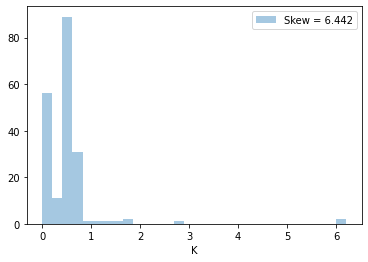

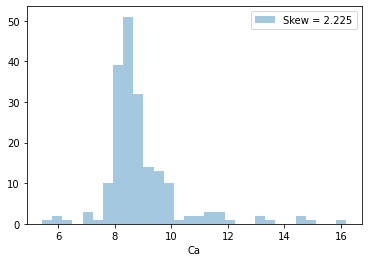

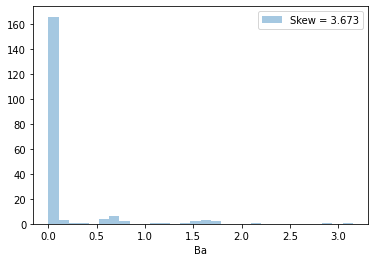

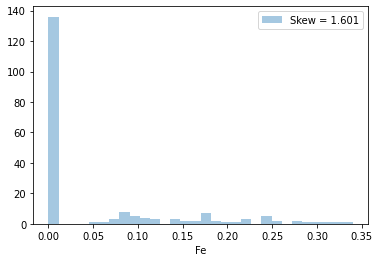

In [10]:
for col in features:
    skew = train[col].skew()
    sns.distplot(train[col],kde=False,label='Skew = %.3f' %(skew),bins=30)
    plt.legend(loc='best')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


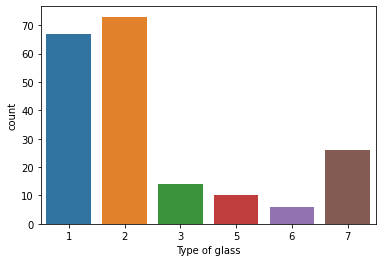

In [11]:
sns.countplot(train['Type of glass'])

In [12]:
x_train = train.drop(columns=['Type of glass',],axis=1)

x_test = test.drop(columns=['Type of glass'],axis=1)


y_train = train['Type of glass']

y_test = test['Type of glass']

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 

In [15]:
classifier= KNeighborsClassifier(n_neighbors=5,metric='euclidean', p=2 )  
classifier.fit(x_train, y_train) 

KNeighborsClassifier(metric='euclidean')

In [16]:
euclid_pred = classifier.predict(x_test)

In [23]:
euclid_score = accuracy_score(y_test,euclid_pred)
euclid_score = euclid_score*100

euclid_score

66.66666666666666

In [18]:
classifier.score(x_test,y_test)*100

66.66666666666666

In [19]:
classifier= KNeighborsClassifier(metric='manhattan')  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(metric='manhattan')

In [20]:
manhat_pred = classifier.predict(x_test)

In [24]:
manhat_score= accuracy_score(y_test,manhat_pred)*100
manhat_score

72.22222222222221

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,manhat_pred))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.50      1.00      0.67         3
           3       1.00      0.33      0.50         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.72        18
   macro avg       0.83      0.72      0.70        18
weighted avg       0.83      0.72      0.70        18



In [27]:
clf_report = pd.DataFrame(classification_report(y_test, manhat_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")

CLASSIFICATION REPORT:
                  1         2         3         5         6         7  \
precision  0.750000  0.500000  1.000000  1.000000  1.000000  0.750000   
recall     1.000000  1.000000  0.333333  0.666667  0.333333  1.000000   
f1-score   0.857143  0.666667  0.500000  0.800000  0.500000  0.857143   
support    3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   

           accuracy  macro avg  weighted avg  
precision  0.722222   0.833333      0.833333  
recall     0.722222   0.722222      0.722222  
f1-score   0.722222   0.696825      0.696825  
support    0.722222  18.000000     18.000000  


In [28]:
clf_report = pd.DataFrame(classification_report(y_test, euclid_pred, output_dict=True))
print(f"CLASSIFICATION REPORT:\n{clf_report}")

CLASSIFICATION REPORT:
             1         2         3         5         6         7  accuracy  \
precision  1.0  0.375000  1.000000  1.000000  1.000000  0.750000  0.666667   
recall     1.0  1.000000  0.333333  0.333333  0.333333  1.000000  0.666667   
f1-score   1.0  0.545455  0.500000  0.500000  0.500000  0.857143  0.666667   
support    3.0  3.000000  3.000000  3.000000  3.000000  3.000000  0.666667   

           macro avg  weighted avg  
precision   0.854167      0.854167  
recall      0.666667      0.666667  
f1-score    0.650433      0.650433  
support    18.000000     18.000000  
